## Purpose:

After conducting data analysis and building a business intelligence report on this dataset, I wanted to create a machine learning algorithm to explore the relationship between poverty rate and the percent of those who lack access to internet.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

## About the Dataset

US Broadband Availability 

Counties in the U.S. refer to region within states having distinct boundaries and a form of official authority. Some states such as Alaska and Texas have county equivalents. There are 3,007 counties and 135 county equivalents resulting in 3,142 total counties, which we see reflected in out total number of counties. (1)
Also, this dataset was sourced from the Institute of Museum and Library Services, 

In [3]:
#Load dataset 

data = pd.read_csv('broadband_access.csv')
df = pd.DataFrame(data)
df

,full_name,county,state,state_abr,population,unemp,health_ins,poverty,SNAP,no_comp,...,broad_avail,broad_cost,population_bbn,price_bbn,wired_bbn,provide_bbn,all25_bbn,downave_bbn,access_bbn,slowfrac_bbn
0,"Autauga County, Alabama",Autauga,Alabama,AL,55869.0,2.7,7.1,15.4,12.7,13.0,...,0.0,NaN,55059.0,35.00,5.433317,11.958735,8.131568,83.951900,90.764671,0.163752
1,"Baldwin County, Alabama",Baldwin,Alabama,AL,223234.0,2.7,10.2,10.6,7.5,11.4,...,0.0,NaN,180490.0,35.00,4.207574,10.167898,6.349044,63.760479,92.428766,0.691290
2,"Barbour County, Alabama",Barbour,Alabama,AL,24686.0,3.8,11.2,28.9,27.4,23.9,...,99.2,74.99,24729.0,35.00,6.778438,12.959400,7.704355,47.471497,79.683691,0.134174
3,"Bibb County, Alabama",Bibb,Alabama,AL,22394.0,3.1,7.9,14.0,12.4,23.7,...,0.0,NaN,23339.0,35.00,3.165046,9.318823,4.041690,29.732685,41.738078,0.499893
4,"Blount County, Alabama",Blount,Alabama,AL,57826.0,2.7,11.0,14.4,9.5,21.3,...,0.0,NaN,44950.0,35.00,4.984383,13.231057,7.862336,20.749740,79.697642,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,"Sweetwater County, Wyoming",Sweetwater,Wyoming,WY,42343.0,3.9,12.0,12.0,5.8,7.7,...,95.1,63.30,42653.0,49.95,6.211029,16.762525,9.476731,29.138326,97.424425,0.036598
3138,"Teton County, Wyoming",Teton,Wyoming,WY,23464.0,2.7,10.0,7.1,2.1,4.2,...,96.0,69.99,21205.0,65.00,5.347984,13.343693,6.456590,102.475246,96.205612,0.082952
3139,"Uinta County, Wyoming",Uinta,Wyoming,WY,20226.0,3.9,12.2,12.5,7.1,6.1,...,73.9,63.30,21153.0,49.95,4.750957,14.600104,7.529807,54.582496,91.824942,0.298917
3140,"Washakie County, Wyoming",Washakie,Wyoming,WY,7805.0,3.9,15.4,12.4,4.9,12.1,...,86.1,64.36,8598.0,42.45,3.914864,11.574320,7.744592,56.961912,90.318911,0.085136


In [4]:
df.shape

(3142, 23)

## State Level

In [5]:
#Created a nw dataframe groupedby state from the master dataframe with the means of the attributes from the counties

overview = df.groupby(['state'],as_index = False).mean()
overview

,state,population,unemp,health_ins,poverty,SNAP,no_comp,no_internet,home_broad,broad_num,broad_avail,broad_cost,population_bbn,price_bbn,wired_bbn,provide_bbn,all25_bbn,downave_bbn,access_bbn,slowfrac_bbn
0,Alabama,73181.865672,3.446269,10.488060,20.337313,17.507463,22.944776,33.577612,65.762687,3.409091,57.825758,88.327222,69911.731343,49.157612,4.814148,10.838665,5.958627,47.332600,74.359848,0.349441
1,Alaska,25225.689655,8.320690,19.934483,13.317241,15.875862,11.262069,23.951724,75.655172,5.344828,69.051724,66.427143,23636.620690,105.160000,1.726710,5.691316,2.226817,20.600432,47.001305,0.656547
2,Arizona,485247.800000,6.446667,11.640000,20.000000,15.953333,16.613333,27.780000,71.726667,3.333333,59.046667,59.987333,422707.200000,52.389333,2.860481,10.490207,4.902482,60.092174,74.896463,0.499513
3,Arkansas,40237.386667,4.184000,8.637333,19.833333,15.681333,20.741333,35.129333,64.164000,3.786667,60.314667,60.787733,37242.040000,46.872571,4.830077,11.444950,5.533106,35.267288,67.244253,0.362922
4,California,681245.224138,5.098276,7.808621,15.020690,10.517241,10.837931,18.086207,81.350000,4.982759,76.705172,70.025862,640892.068966,40.548966,4.601385,13.626479,7.123905,67.470294,92.915313,0.521082
5,Colorado,89980.250000,2.843750,9.751563,13.062500,10.128125,11.737500,20.389063,78.782813,3.984375,71.407813,73.258906,77970.390625,57.980328,3.541120,12.951891,6.445604,47.438122,88.273265,0.316523
6,Connecticut,445660.875000,3.625000,4.637500,9.162500,11.075000,10.112500,15.450000,84.125000,4.375000,98.837500,73.440000,445692.750000,52.742500,2.835283,7.846139,4.634275,81.766163,99.083755,0.716262
7,Delaware,324588.000000,3.900000,6.466667,12.233333,12.733333,10.500000,17.666667,81.900000,3.000000,97.833333,97.410000,295944.333333,39.990000,4.429109,10.508274,5.221760,110.355583,98.209004,0.326188
8,District of Columbia,705749.000000,5.500000,4.000000,16.800000,13.900000,10.200000,19.700000,80.000000,3.000000,95.100000,67.490000,600097.000000,39.990000,5.273014,12.208560,6.055503,100.694846,99.345496,0.449582
9,Florida,320563.238806,3.477612,13.434328,16.589552,15.311940,14.880597,24.301493,75.010448,5.328358,82.095522,71.295373,280081.641791,45.544375,4.545409,10.046651,6.275757,66.492773,83.436233,0.420855


In [108]:
dd1 = overview[['poverty','no_internet']]
dd1

,poverty,no_internet
0,20.337313,33.577612
1,13.317241,23.951724
2,20.000000,27.780000
3,19.833333,35.129333
4,15.020690,18.086207
5,13.062500,20.389063
6,9.162500,15.450000
7,12.233333,17.666667
8,16.800000,19.700000
9,16.589552,24.301493


## Method #1

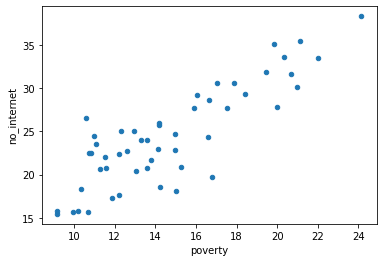

In [109]:
dd1.plot(kind='scatter',x='poverty',y='no_internet')
plt.show()

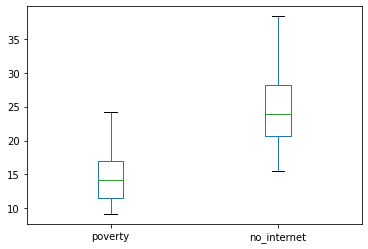

In [110]:
dd1.plot(kind='box')
plt.show()

In [111]:
dd1.corr()

,poverty,no_internet
poverty,1.000000,0.848955
no_internet,0.848955,1.000000


In [112]:
Poverty = pd.DataFrame(dd1['poverty'])
No_internet = pd.DataFrame(dd1['no_internet'])

In [113]:
lm= linear_model.LinearRegression()
model = lm.fit(Poverty,No_internet)

In [114]:
model.coef_

array([[1.29198095]])

In [115]:
model.intercept_

array([5.48812643])

In [116]:
model.score(Poverty, No_internet)

0.7207244631328034

In [117]:
New_Poverty = 20
No_internet_predict = model.predict([[10]])
No_internet_predict

#regression.predict([[60]])

array([[18.40793597]])

## Method #2

In [118]:
X = dd1.iloc[:,:-1].values  
y = dd1.iloc[:,1].values

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [120]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [121]:
y_pred = regressor.predict(X_test) 
y_pred

array([16.3827645 , 18.74865393, 32.86481185, 24.72323733, 31.91160235,
       20.72739781, 19.39594488, 22.73481913, 23.54137235, 24.77190679,
       28.35273111, 26.01100026, 19.00983455, 23.46479053, 18.44943452,
       20.77519355, 21.79033363])

In [122]:
y_test

array([15.81      , 22.54      , 31.70062893, 24.75060241, 27.78      ,
       22.42352941, 20.65714286, 20.76451613, 25.77857143, 18.0862069 ,
       27.769     , 27.6969697 , 24.42473118, 23.02159091, 26.54528302,
       17.66666667, 25.05869565])

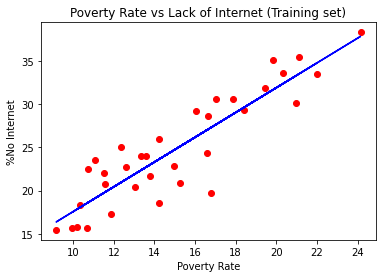

In [123]:
#plot for the TRAIN
 
plt.scatter(X_train, y_train, color='red') # plotting the observation line
 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Poverty Rate vs Lack of Internet (Training set)") # stating the title of the graph
 
plt.xlabel("Poverty Rate") # adding the name of x-axis
plt.ylabel("%No Internet") # adding the name of y-axis
plt.show() # specifies end of graph

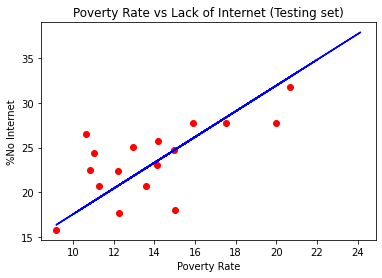

In [124]:
#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Poverty Rate vs Lack of Internet (Testing set)")
 
plt.xlabel("Poverty Rate") 
plt.ylabel("%No Internet") 
plt.show() 

In [125]:
import numpy as np

print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))

Mean squared error: 12.34


In [135]:
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Variance score: 0.32


In [126]:
from sklearn.metrics import mean_squared_error, r2_score

preds = regressor.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,preds))

R2 score : 0.25


## County Level 

In [89]:
#Dataframe of poverty and no internet from master data set involving the counties

dd2 = df[['poverty','no_internet']]
dd2

,poverty,no_internet
0,15.4,20.9
1,10.6,21.3
2,28.9,38.9
3,14.0,33.8
4,14.4,30.6
...,...,...
3137,12.0,16.1
3138,7.1,13.6
3139,12.5,11.5
3140,12.4,21.5


In [90]:
dd2.isnull().values.any()

True

In [76]:
dd2.isnull().sum()

poverty        1
no_internet    0
dtype: int64

In [81]:
dd2.loc[dd2['poverty'].isnull()]

#This has no poverty level
#Q: Should I find the value and fill it in or just drop this row?

,full_name,poverty,no_internet
1816,"Rio Arriba County, New Mexico",NaN,47.5


In [91]:
#dd2['poverty'] = dd2['poverty'].fillna(int(26.4))
#dd2
#Need to fill with 26.4, but dropping was easiest 

dd2_ = dd2.dropna()
dd2_.isnull().values.any()

False

In [101]:
dd2_.corr()

,poverty,no_internet
poverty,1.000000,0.659535
no_internet,0.659535,1.000000


### Method #1

In [129]:
Poverty = pd.DataFrame(dd2_['poverty'])
No_internet = pd.DataFrame(dd2_['no_internet'])

In [130]:
lm= linear_model.LinearRegression()
model = lm.fit(Poverty,No_internet)

In [131]:
model.coef_

array([[0.93275676]])

In [132]:
model.intercept_

array([12.01848052])

In [133]:
model.score(Poverty, No_internet)

0.43498661637008484

In [134]:
New_Poverty = 20
No_internet_predict = model.predict([[17]])
No_internet_predict

array([[27.87534547]])

### Method #2

In [127]:
X = dd2_.iloc[:,:-1].values  
y = dd2_.iloc[:,1].values

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred = regressor.predict(X_test) 
y_pred

array([29.90218462, 24.03117058, 21.32864031, ..., 27.57241714,
       25.89498456, 27.19965435])

In [96]:
y_test

array([32.4, 21.7, 16.5, ..., 29. , 29.4, 25.7])

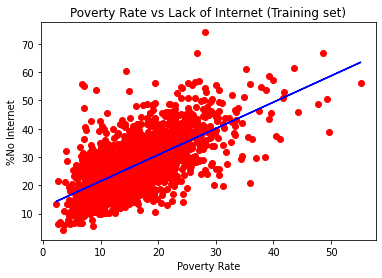

In [97]:
#plot for the TRAIN
 
plt.scatter(X_train, y_train, color='red') # plotting the observation line
 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Poverty Rate vs Lack of Internet by County (Training set)") # stating the title of the graph
 
plt.xlabel("Poverty Rate") # adding the name of x-axis
plt.ylabel("%No Internet") # adding the name of y-axis
plt.show() # specifies end of graph

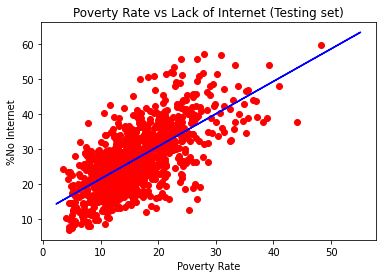

In [98]:
#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Poverty Rate vs Lack of Internet by County (Testing set)")
 
plt.xlabel("Poverty Rate") 
plt.ylabel("%No Internet") 
plt.show() 

In [99]:
import numpy as np

print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))

Mean squared error: 43.73


In [100]:
from sklearn.metrics import mean_squared_error, r2_score

preds = regressor.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,preds))

R2 score : 0.45


## Works Cited

In [ ]:
https://www.askpython.com/python/examples/linear-regression-in-python
https://www.codegrepper.com/code-examples/python/how+to+find+the+accuracy+of+linear+regression+model
https://stackoverflow.com/questions/54296377/valueerror-expected-2d-array-got-scalar-array-instead
https://www.geeksforgeeks.org/predicting-air-quality-index-using-python/
https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/
https://www.youtube.com/watch?v=fzZ0HO-uz1o
https://www.usnews.com/news/healthiest-communities/new-mexico/rio-arriba-county

## Questions/ Thoughts

In [ ]:
What are we trying to predict?

In [ ]:
Provide brief understanding & background for ML
Provide purpose of project 

In [ ]:
Can we predict the digital divide probability, like a digital divide index? We need logistic regression for this? 
#poverty rate x no_internet will give us an indicator, they are 2 percentages, 
#logistic regression?

## Code Returning Errors

In [ ]:
pov = dd1.poverty.values.reshape(-1,1)
int_ = dd1.no_internet.values.reshape(-1,1)

regression = linear_model.LinearRegression()
regression.fit(pov,int_)

print(regression.predict(60))

In [ ]:
regression = linear_model.LinearRegression()
regression.fit(Poverty,No_internet)

print(regression.predict(60))

In [ ]:
https://www.tutorialspoint.com/logistic_regression_in_python/logistic_regression_in_python_quick_guide.htm